In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Our ML tools ---
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor # <-- Note: Regressor, not Classifier!

# --- Our Evaluation tools ---
from sklearn.metrics import mean_squared_error, r2_score

# --- Load the Data ---
housing = fetch_california_housing()
X = housing.data
y = housing.target



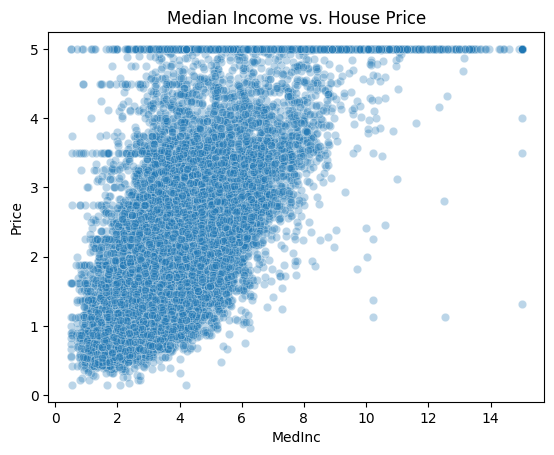

In [2]:

# --- 2. Explore the Data (EDA) ---
# We already did this in Lesson 8, but let's re-plot
# our main relationship to remind ourselves.
df = pd.DataFrame(X, columns=housing.feature_names)
df['Price'] = y

sns.scatterplot(x='MedInc', y='Price', data=df, alpha=0.3)
plt.title('Median Income vs. House Price')
plt.show()



In [3]:

# --- 3. Prepare the Data ---
# X and y are already defined
# The GOLDEN RULE!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Scale the Data ---
# Vijay: "Do I *really* have to scale?
# AK: "For KNN? YES. 100%. The distance formula will fail without it.
# This is the most important pre-processing step for this model!"

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [4]:

# --- 4. Create & Train the Model ---
# 1. Import (we did)
# 2. Create an "instance"
#    Let's pick 'K=9'. (Just a guess, we'll talk about picking K later)
model = KNeighborsRegressor(n_neighbors=9)

# 3. TRAIN!
# Remember, this is just memorizing 🧠
print("\n...Memorizing the data...")
model.fit(X_train_scaled, y_train)
print("...Memorization complete!...")




...Memorizing the data...
...Memorization complete!...


In [5]:
# --- 5. Predict & Evaluate ---
# 4. Predict
# THIS is where all the work happens. It's finding the 9
# closest neighbors for every point in the test set and averaging their prices.
print("...Calculating distances and averaging...")
y_pred = model.predict(X_test_scaled)

# 5. Evaluate (Get the score!)
print("\n--- Model Evaluation (KNN Regression) ---")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

print("\n--- For Comparison (from Lesson 8) ---")
print("Linear Regression R² was: 0.58")



...Calculating distances and averaging...

--- Model Evaluation (KNN Regression) ---
Root Mean Squared Error (RMSE): 0.65
R-Squared (R²): 0.68

--- For Comparison (from Lesson 8) ---
Linear Regression R² was: 0.58
